# Tutorial on AI2Thor

AI2Thor is a virtual, interactive environment, which we will be using for the group project in this course. The functionality provided by AI2Thor includes for example moving around the environment, and accessing the metadata of objects in the current view.

This tutorial is largely based on these two notebooks, which can also be useful for you to look at: \
https://colab.research.google.com/github/allenai/ai2thor-colab/blob/main/templates/AI2_THOR_Full_Starter_Template.ipynb

https://colab.research.google.com/drive/1Il6TqmRXOkzYMIEaOU9e4-uTDTIb5Q78

There are a lot of other things you can do in AI2Thor that are not mentioned in this tutorial, such as manipulate objects (e.g. open a fridge, slice an apple, move an object from A to B). You don't necessarily need to use any of these functionalities in your project, but if you are interested you can find more information in the documentation: https://ai2thor.allenai.org/ithor/documentation

## Setup

In [1]:
!pip install --upgrade ai2thor --quiet
!pip install ai2thor-colab prior --upgrade &> /dev/null

To run AI2Thor on Google Colab, you need to install `xvfb` (not needed if you are running AI2Thor on your own computer):

In [10]:
import os
os.system('apt-get install xvfb')

0

We are using a dataset called "procthor-10k" which contains 12 thousand virtual houses. If you want to have a look at the paper about ProcThor, it's here: https://arxiv.org/abs/2206.06994

In [2]:
import prior

dataset = prior.load_dataset("procthor-10k")
dataset

[AI2-THOR WARNING] There has been an update to ProcTHOR-10K that must be used with AI2-THOR version 5.0+. To use the new version of ProcTHOR-10K, please update AI2-THOR to version 5.0+ by running:
    pip install --upgrade ai2thor
Alternatively, to downgrade to the old version of ProcTHOR-10K, run:
   prior.load_dataset("procthor-10k", revision="ab3cacd0fc17754d4c080a3fd50b18395fae8647")


Loading test: 100%|████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7691.02it/s]


DatasetDict(
    train=Dataset(
    dataset=procthor-dataset,
    size=10000,
    split=train
),
    val=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=val
),
    test=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=test
)
)

The next cell is again only necessary if you are running this in Google Colab.

In [12]:
import ai2thor_colab
ai2thor_colab.start_xserver()

Let's choose an virtual house from the training set:

In [3]:
house = dataset["train"][11]

Next, we need to instantiate a controller:

In [4]:
from ai2thor.controller import Controller

In [5]:

controller = Controller(scene=house, visibilityDistance=2, width=750, height=750)

Now that we have instantiated a controller, we can start moving around!

## Moving around

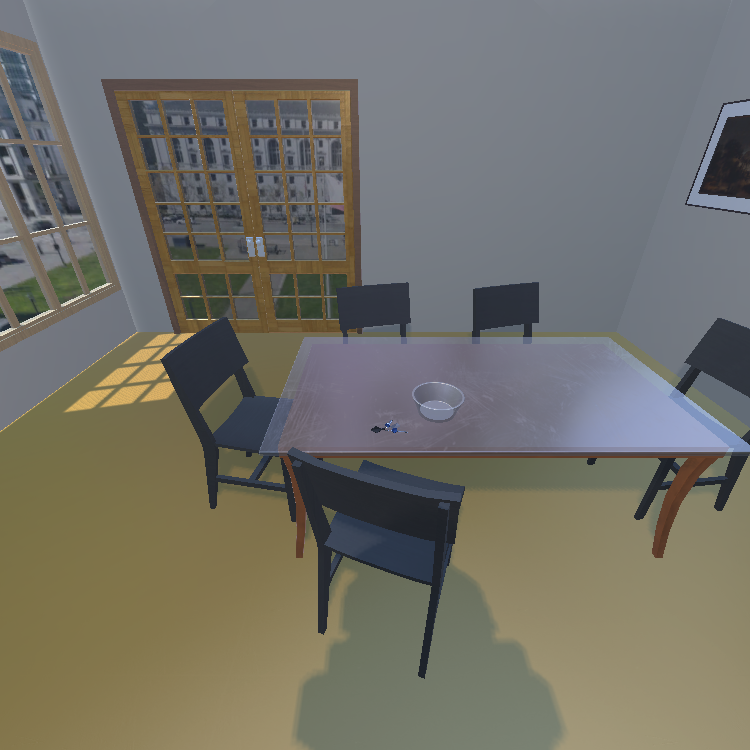

In [6]:
from PIL import Image
Image.fromarray(controller.last_event.frame)

In [25]:
controller.step("RotateRight") # or "RotateLeft"

<ai2thor.server.Event at 0x7f77c3c46470
    .metadata["lastAction"] = RotateRight
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

When rotating around, you probably noticed that there are some object types that appear multiple times in this scene, e.g. multiple chairs, multiple paintings, multiple shelving units. This means that if you are in this room, and you for example refer to "the painting on the wall", you could be referring to either of the two paintings in the room. This type of ambiguity is something you'll need to find a way to deal with in your group project.

In [30]:
controller.step("MoveAhead") # or "MoveBack", "MoveLeft", "MoveRight"

<ai2thor.server.Event at 0x7f77c3b27f10
    .metadata["lastAction"] = MoveLeft
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

In your project, you may at some point want to teleport the robot to another random position in the house. To do this, you need to know which positions in the house are reachable (i.e. the robot can be in this position, which it for instance cannot if another object is already located there). The following code returns a list of all the "reachable positions":

In [32]:
event = controller.step(action="GetReachablePositions")
reachable_positions = event.metadata["actionReturn"]
event.metadata["actionReturn"]

[{'x': 2.25, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 2.5, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 2.25, 'y': 0.9009997844696045, 'z': 5.25},
 {'x': 2.0, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 2.25, 'y': 0.9009997844696045, 'z': 4.75},
 {'x': 2.75, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 2.5, 'y': 0.9009997844696045, 'z': 4.75},
 {'x': 2.0, 'y': 0.9009997844696045, 'z': 5.25},
 {'x': 1.75, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 2.0, 'y': 0.9009997844696045, 'z': 4.75},
 {'x': 2.25, 'y': 0.9009997844696045, 'z': 4.5},
 {'x': 3.0, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 2.75, 'y': 0.9009997844696045, 'z': 4.75},
 {'x': 2.5, 'y': 0.9009997844696045, 'z': 4.5},
 {'x': 2.0, 'y': 0.9009997844696045, 'z': 5.5},
 {'x': 1.75, 'y': 0.9009997844696045, 'z': 5.25},
 {'x': 1.5, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 1.75, 'y': 0.9009997844696045, 'z': 4.75},
 {'x': 2.0, 'y': 0.9009997844696045, 'z': 4.5},
 {'x': 2.25, 'y': 0.9009997844696045, 'z': 4.25},
 {'x': 3.25, 'y': 0.9

Then we can randomly choose a reachable position and a random rotation, before teleporting the robot to that location:

Teleporting the agent to {'x': 7.75, 'y': 0.9009997844696045, 'z': 3.75}  with rotation 143


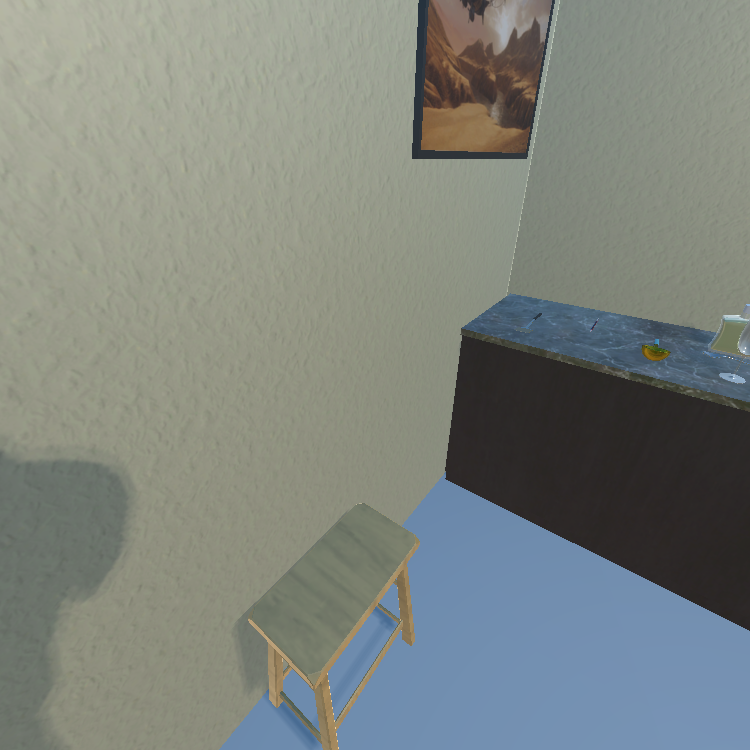

In [34]:
import random

position = random.choice(reachable_positions)
rotation = random.choice(range(360))
print("Teleporting the agent to", position, " with rotation", rotation)

event = controller.step(action="Teleport", position=position, rotation=rotation)

Image.fromarray(event.frame)

## Events

After each action (eg. "MoveAhead", "RotateRight"...) an `Event` is returned. It contains a lot of information that could be useful for your project. The very first action after you've instantiated the controller is always "CreateHouse". You can access the `Event` data for this action as follows:

In [35]:
controller.last_event

<ai2thor.server.Event at 0x7f77c3b429e0
    .metadata["lastAction"] = Teleport
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

We can also get an image of what the most recent scene looks like (i.e. what the robot can see). To do this, we need to use `.frame`. This gives us the RGB frame of the scene, in a numpy array:

In [7]:
controller.last_event.frame

array([[[119, 124, 135],
        [119, 124, 134],
        [119, 124, 134],
        ...,
        [119, 126, 136],
        [119, 126, 136],
        [119, 126, 136]],

       [[119, 124, 134],
        [119, 124, 134],
        [119, 124, 134],
        ...,
        [119, 126, 136],
        [119, 126, 136],
        [119, 126, 136]],

       [[120, 124, 134],
        [119, 124, 134],
        [119, 124, 134],
        ...,
        [119, 126, 136],
        [119, 126, 136],
        [119, 126, 136]],

       ...,

       [[132, 118,  77],
        [132, 118,  77],
        [132, 118,  76],
        ...,
        [153, 144, 115],
        [153, 144, 115],
        [153, 144, 114]],

       [[132, 119,  77],
        [132, 118,  77],
        [132, 118,  76],
        ...,
        [153, 145, 115],
        [153, 144, 115],
        [153, 144, 115]],

       [[132, 119,  77],
        [132, 119,  77],
        [132, 118,  77],
        ...,
        [153, 145, 115],
        [153, 144, 115],
        [153, 144, 114]]

We can also easily turn this numpy array into an image:

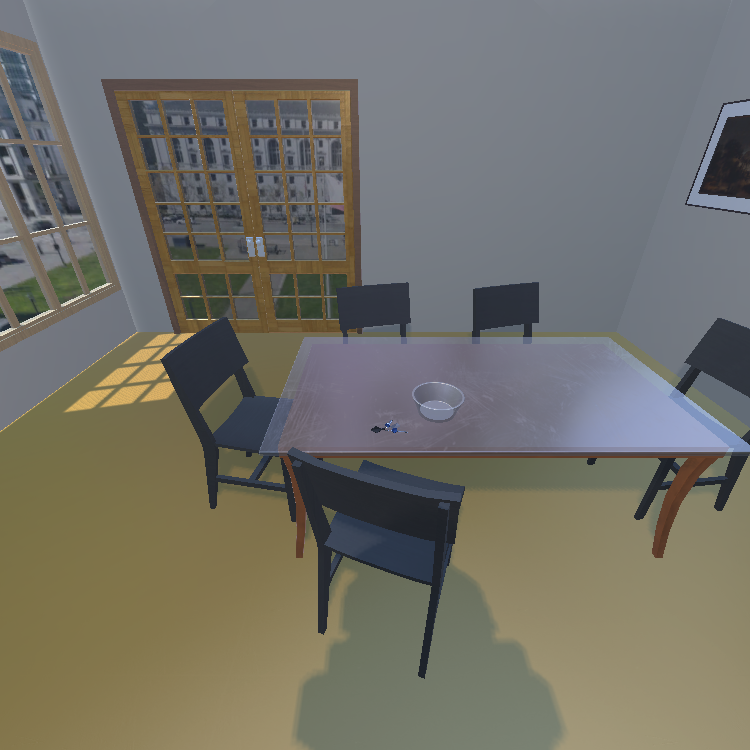

In [8]:
Image.fromarray(controller.last_event.frame)

One very important type of data you can get from this is the `.metadata`. It contains information on for example the agent's current position and rotation, as well as all objects in the current view, including a lot of object properties. Let's first look at the information about the agent:

In [38]:
controller.last_event.metadata["agent"]

{'name': 'agent',
 'position': {'x': 7.75, 'y': 0.9009993672370911, 'z': 3.75},
 'rotation': {'x': -0.0, 'y': 143.0, 'z': 0.0},
 'cameraHorizon': 30.000003814697266,
 'isStanding': True,
 'inHighFrictionArea': False}

Now let's look at the objects in the metadata:

In [ ]:
for object in controller.last_event.metadata["objects"]:
  print(object["name"])

You probably noticed that there are quite a few objects that you cannot actually see if you look at the visualization of the current frame. This is because all objects that are visible (i.e. not hidden behind something) and within the `visibilityDistance` (specified when we initialized the controller) are shown. If you only want the objects that the robot can actually see, you need to only pick objects with `visible=True` (visible being one of the object attributes).

In [40]:
for object in controller.last_event.metadata["objects"]:
  if object["visible"]:
    print(object["name"])

CounterTop|2|0
Cup|surface|2|8
Ladle|surface|2|3
Painting|2|6
Pen|surface|2|0
SoapBottle|surface|2|2
Spatula|surface|2|5
Spoon|surface|2|4
Stool|2|4
wall|2|8.39|1.68|8.39|5.03
wall|exterior|8.39|1.68|8.39|5.03


Finally, let's look at what other properties the currently visible objects have:

In [41]:
for object in controller.last_event.metadata["objects"]:
  if object["visible"]:
    print(object)

{'name': 'CounterTop|2|0', 'position': {'x': 8.361964225769043, 'y': 2.9802322387695312e-08, 'z': 1.7049989700317383}, 'rotation': {'x': -0.0, 'y': 0.0, 'z': 0.0}, 'visible': True, 'isInteractable': True, 'receptacle': True, 'toggleable': False, 'isToggled': False, 'breakable': False, 'isBroken': False, 'canFillWithLiquid': False, 'isFilledWithLiquid': False, 'fillLiquid': None, 'dirtyable': False, 'isDirty': False, 'canBeUsedUp': False, 'isUsedUp': False, 'cookable': False, 'isCooked': False, 'temperature': 'RoomTemp', 'isHeatSource': False, 'isColdSource': False, 'sliceable': False, 'isSliced': False, 'openable': False, 'isOpen': False, 'openness': 0.0, 'pickupable': False, 'isPickedUp': False, 'moveable': False, 'mass': 0.0, 'salientMaterials': None, 'receptacleObjectIds': ['Spatula|surface|2|5', 'Ladle|surface|2|3', 'Pen|surface|2|0', 'Cup|surface|2|8', 'Spoon|surface|2|4', 'SoapBottle|surface|2|2', 'Spatula|surface|2|6', 'SprayBottle|surface|2|1'], 'distance': 2.3169655799865723, 